In [1]:
##Import Important Modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pickle

In [2]:
#Read the data

df = pd.read_excel("DataSet/dataset.xlsx", header = 0)
df.shape
df.head(5)

,Customer,Type,Cost,Qty,ProdName,Unnamed: 5,Unnamed: 6
0,PT Putera Meranti Sukses,1,2.7000,5,Anggur Merah 620 ml,NaN,NaN
1,PT Putera Meranti Sukses,1,5.4000,10,Anggur Merah 620 ml,NaN,NaN
2,PT Putera Meranti Sukses,1,2.8750,5,Anggur Merah Gold 620 ml,NaN,NaN
3,PT Putera Meranti Sukses,1,5.8000,10,Anggur Merah Gold 620 ml,NaN,NaN
4,CV Anugrah Sri Menanti,2,5.6363,10,Aqua 1500 ml,NaN,NaN


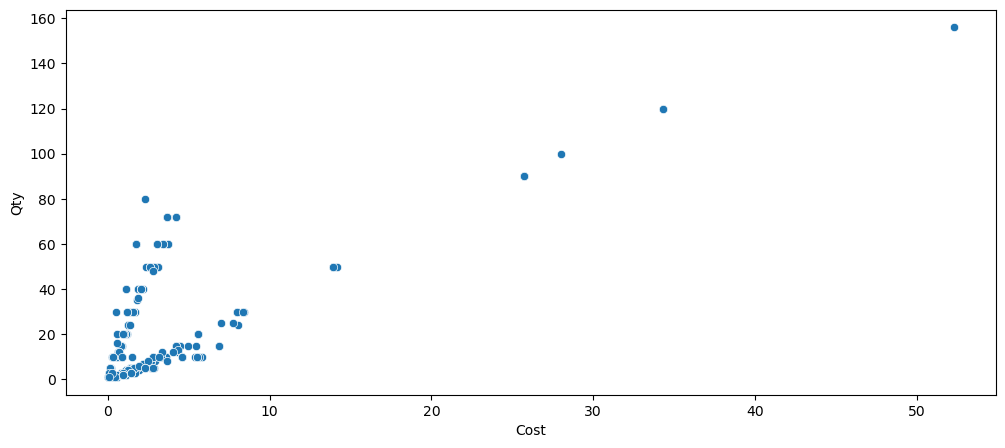

In [3]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x="Cost", y="Qty")
plt.show()

In [4]:
from sklearn.cluster import KMeans
XFeatures = df[['Cost', 'Qty']]
model = KMeans(n_clusters=3)

In [5]:
sum_of_sqr_distance = []
k_range = range(1,10)
for k in k_range:
    km_model = KMeans(n_clusters=k)
    km_model.fit(XFeatures)
    sum_of_sqr_distance.append(km_model.inertia_)

C:\Users\theen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

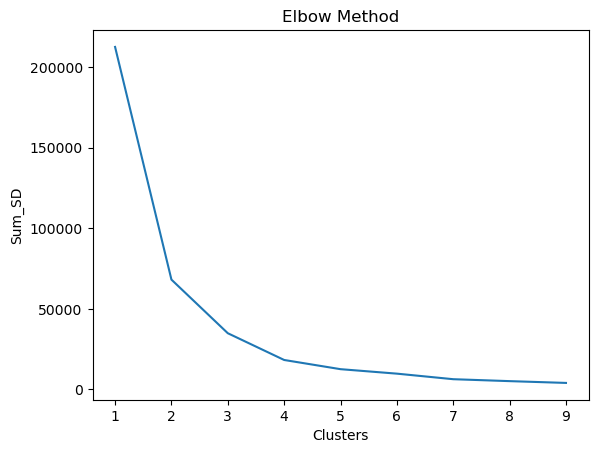

In [6]:
plt.plot(k_range,sum_of_sqr_distance)
plt.xlabel('Clusters')
plt.ylabel('Sum_SD')
plt.title('Elbow Method')
plt.show

#### According to the Elbow Method, 3 is the optimal number of clusters

In [7]:
model.fit(XFeatures)

KMeans(n_clusters=3)

In [8]:
pred = model.predict(XFeatures)
print(pred)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 1 2 1 0 0 0 2 0 0 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 1 2 2 0 0 2 1 1 1 2 2 0 0 2 1 1 1 0
 1 1 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [9]:
df['Clusters'] = pred

In [10]:
df["Clusters"] = df["Clusters"].replace(0, 'Private/Small Business')
df["Clusters"] = df["Clusters"].replace(1, 'Business')
df["Clusters"] = df["Clusters"].replace(2, 'Big Business')
df.head(69)

,Customer,Type,Cost,Qty,ProdName,Unnamed: 5,Unnamed: 6,Clusters
0,PT Putera Meranti Sukses,1,2.70000,5,Anggur Merah 620 ml,NaN,NaN,Private/Small Business
1,PT Putera Meranti Sukses,1,5.40000,10,Anggur Merah 620 ml,NaN,NaN,Private/Small Business
2,PT Putera Meranti Sukses,1,2.87500,5,Anggur Merah Gold 620 ml,NaN,NaN,Private/Small Business
3,PT Putera Meranti Sukses,1,5.80000,10,Anggur Merah Gold 620 ml,NaN,NaN,Private/Small Business
4,CV Anugrah Sri Menanti,2,5.63630,10,Aqua 1500 ml,NaN,NaN,Private/Small Business
...,...,...,...,...,...,...,...,...
64,CV Anugrah Sri Menanti,2,1.55454,30,Aqua 600 ml,NaN,NaN,Business
65,JC Supermarket BCS,4,3.42000,60,Aqua 600 ml,NaN,NaN,Business
66,JC Supermarket BCS,4,1.14000,20,Aqua 600 ml,NaN,NaN,Private/Small Business
67,KK Pelangi,4,0.57000,10,Aqua 600 ml,NaN,NaN,Private/Small Business


In [11]:
df[['Qty','Clusters']]

,Qty,Clusters
0,5,Private/Small Business
1,10,Private/Small Business
2,5,Private/Small Business
3,10,Private/Small Business
4,10,Private/Small Business
...,...,...
434,2,Private/Small Business
435,20,Private/Small Business
436,3,Private/Small Business
437,1,Private/Small Business


[Text(0.5, 0, '')]

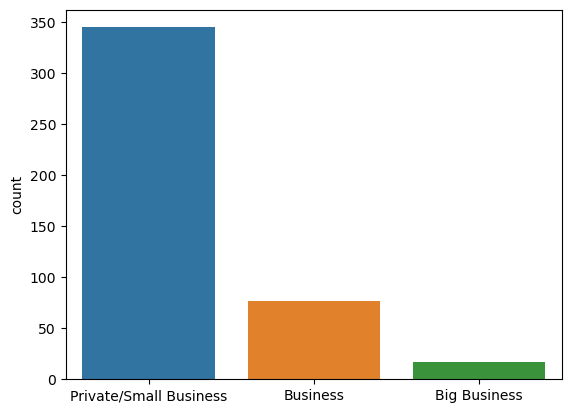

In [12]:
sns.countplot(x='Clusters', data=df).set(xlabel=None)

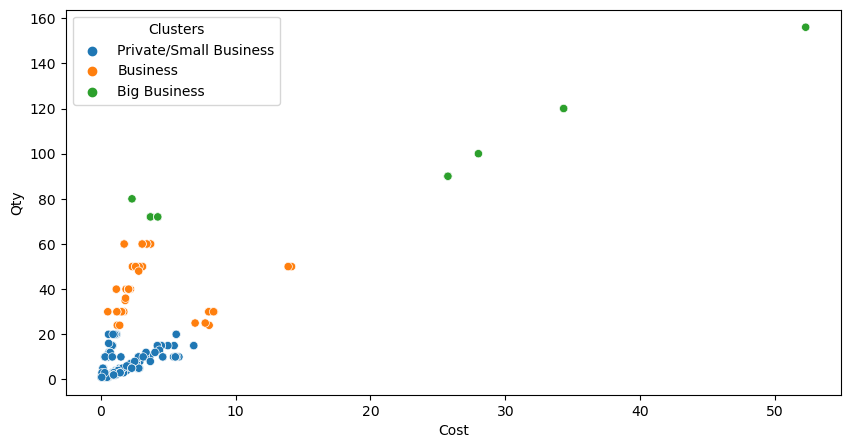

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Cost", y="Qty", hue="Clusters")
plt.show()

In [14]:
filename = "customer_clustering"
pickle.dump(model, open(filename,'wb'))